PART - B

Carry out a hypothesis test for “mean” of a population. The population standard deviation is
13.46, and the test is for a “mean” different from 60. Given: a sample size of 30, with “sample
mean” 65.10. Consider alpha = 0.05. Demonstrate your solution using either the critical-value or
p-value method.

In [ ]:
import numpy as np
import scipy.stats as st

H0 : μ = 60, Ha : μ !=60

In [ ]:
#H0 : μ = 60, Ha :  μ !=60
n = 30
xbar = 65.10
mu = 60
sigma = 13.46
alpha = 0.05

Hypothesis test using z-test

In [ ]:
z_critical = st.norm.ppf(1-(alpha/2))
z_critical

1.959963984540054

In [ ]:
z = (xbar-mu)/(sigma/np.sqrt(n))
z

2.075323211943792

In [ ]:
if (z < z_critical) and (z > -z_critical): 
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


PART A

1) State the Null and Alternative Hypothesis.

Null Hypothesis : Every plant bearing flowers in purple to white ratio is 3:1

Alternate hypothesis: Every plant bearing flowers in purple to white ratio is not 3:1



2) What statistic do you recommend to apply for this case

Statistic recommended : Ratio between purple and white flower

3) State the observed statistic

Total plants : 929

Total number of purple flowers : 705 + 38 = 743

Total number of white flowers : 929 - 743 = 186


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
import random

flower = ['purple']*771  #705+38=743
white = ['white']*158     #929-743=186

flower.extend(white)

random.shuffle(flower)
flower[645:660]

['purple',
 'purple',
 'purple',
 'purple',
 'white',
 'white',
 'white',
 'purple',
 'purple',
 'white',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple']

converting the above list into a dataset

In [ ]:
import pandas as pd
df = pd.DataFrame(flower,columns=['Flower'])
df

,Flower
0,white
1,white
2,purple
3,purple
4,purple
...,...
924,white
925,purple
926,purple
927,purple


In [ ]:
#number of purple flowers
purple_count = df[df["Flower"]  == 'purple'].count()
print("Purple flowers count is :")
purple_count

Purple flowers count is :


Flower    771
dtype: int64

In [ ]:
#number of white flowers
purple_count = df[df["Flower"]  == 'white'].count()
print("Purple flowers count is :")
purple_count

Purple flowers count is :


Flower    158
dtype: int64

In [ ]:
total_flowers = df["Flower"].count()
print("Total Flower count :", total_flowers)

Total Flower count : 929


In [ ]:
obs_prop = purple_count/total_flowers
obs_prop

Flower    0.170075
dtype: float64

In [ ]:
obs_stat = abs(obs_prop - 0.75)
obs_stat

Flower    0.579925
dtype: float64

In [ ]:
# New model to simulate the sample
sample = ['purple', 'purple', 'purple', 'white']
ns = np.random.choice(sample, total_flowers)

In [ ]:
prop_purple = np.count_nonzero(ns == 'purple')/total_flowers
print("Proportion of purple-flowers in the new sample which differs from 0.75 is", abs(prop_purple - 0.75))

Proportion of purple-flowers in the new sample which differs from 0.75 is 0.00457481162540363


In [ ]:
import numpy.random as npr

simul = 1762  #2000-238=1762

for i in range(simul):
    s = npr.binomial(total_flowers, 0.75, simul)
    
s

array([669, 687, 684, ..., 707, 698, 700])

In [ ]:
df1 = pd.DataFrame(s, columns =['Count'])

df1['sampled_stats']= (df1['Count'] / total_flowers)
df1 = df1.set_index('Count')
df1['Distance from 0.75'] = abs(df1['sampled_stats'] - 0.75)

df1.head()

,sampled_stats,Distance from 0.75
Count,,
669,0.720129,0.029871
687,0.739505,0.010495
684,0.736276,0.013724
714,0.768568,0.018568
709,0.763186,0.013186


plotting histogram

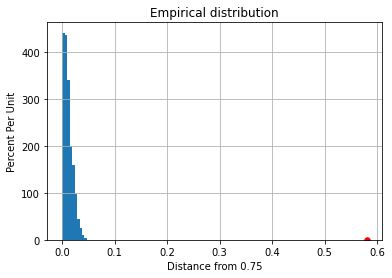

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df1['Distance from 0.75'])
plt.scatter(obs_stat, 0, color='red', s=30)      #obs_stat= 0.579925
plt.title('Empirical distribution')
plt.xlabel('Distance from 0.75')
plt.ylabel('Percent Per Unit')
plt.grid()
plt.show()

Conclusion - The observed value of the statistic, based on Mendel's data, is 0.0.579925 where we drew a red line that is away from the distribution we got on the right side.

So we have enough evidence to prove that Mendel's model is not valid, so we REJECT THE NULL HYPOTHESIS